# Netflix EDA

## Motivación

El dataset de Netflix fue seleccionado debido a su relevancia en la industria del entretenimiento, donde la personalización de contenido y la predicción de preferencias de los usuarios son factores clave. Analizar este conjunto de datos permite explorar cómo las características de películas y programas de TV se relacionan con la clasificación por edades, facilitando un estudio educativo de Machine Learning con aplicaciones prácticas en recomendaciones y análisis de tendencias.

## Preguntas de Investigación

El objetivo principal de este estudio es explorar cómo las características del contenido disponible en Netflix se relacionan con la clasificación por edades y evaluar la capacidad de los modelos de Machine Learning para predecir dicha clasificación. A partir de este objetivo, se plantean las siguientes preguntas de investigación:

---

#### 1. **¿Cómo se relacionan las características del contenido de Netflix con su clasificación por edades?**
    Esta pregunta busca comprender la distribución de las clasificaciones entre películas y programas de TV, identificar los géneros más frecuentes dentro de cada categoría y analizar los países que producen con mayor frecuencia contenido en cada clasificación.

---

#### 2. **¿Es posible predecir la clasificación por edades de un título a partir de sus atributos?**
    Se pretende predecir la clasificación de un título utilizando variables como país de origen, género, año de lanzamiento y duración, evaluando la precisión de distintos algoritmos y determinando cuáles características son los mejores predictores.

---

#### 3. **¿Cómo han evolucionado las clasificaciones por edades a lo largo del tiempo?**
    Esta pregunta analiza los cambios en la distribución de clasificaciones según el año de lanzamiento, las variaciones en la popularidad de los géneros dentro de cada clasificación y las tendencias recientes en el catálogo de Netflix.

## Variable objetivo

- **`rating`** (categórica): Clasificación por edades de cada título (por ejemplo, TV-MA, PG-13, G).

## Fuente

Conjunto de datos público de Netflix, que contiene más de 8,000 películas y programas de TV disponibles en la plataforma hasta mediados de 2021, con información sobre cast, directores, país, año de lanzamiento, duración y género.

---

Enlace al dataset: [Netflix Movies and TV Shows Dataset en Kaggle](https://www.kaggle.com/datasets/shivamb/netflix-shows?resource=download)

## Diccionario de variables

| **Columna** | **Descripción**                                                                                  |
| --------------- | ------------------------------------------------------------------------------------------------ |
| `show_id`       | Un identificador único para cada película o programa de TV.                                      |
| `type`          | Especifica si el contenido es una *Movie* o un *TV Show*.                                        |
| `title`         | El título o nombre del contenido.                                                                |
| `director`      | Nombre(s) del o los directores de la película o programa.                                        |
| `cast`          | Lista de actores que aparecen en el contenido.                                                   |
| `country`       | País de origen donde se produjo el contenido.                                                    |
| `date_added`    | La fecha en que el contenido fue añadido a Netflix.                                              |
| `release_year`  | El año en que el contenido fue lanzado originalmente.                                            |
| `rating`        | Clasificación de contenido (por ejemplo, TV-MA, PG-13) que indica su adecuación para el público. |
| `duration`      | Duración de las películas en minutos o el número de temporadas para programas de TV.             |
| `listed_in`     | Categorías o géneros a los que pertenece el contenido (por ejemplo, Drama, Comedia, Acción).     |
| `description`   | Un breve resumen o sinopsis del contenido.                                                       |

## Riesgos / Limitaciones

- Datos faltantes en variables como `director`, `cast` o `country`.  
- Posible sesgo geográfico, ya que la mayoría del contenido puede provenir de un número reducido de países.  
- Clasificaciones de edad (`rating`) inconsistentes o incompletas en algunos títulos.  
- Variabilidad en el formato de la duración (`duration`) que requiere limpieza para análisis numérico.
The showid column have s1,s2,s3... instead of 1,2,3...
director contains large amount of NULL values
cast contains large amount of NULL values
country contains large amount of NULL values
date_added contains large amount of NULL values
rating contains 4 NULL values
duration contains 3 NULL values

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
# Cargar dataset 
df = pd.read_csv('C:/Users/luigu/OneDrive/Escritorio/Proyecto ML - Netflix/data/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [140]:
# Información general del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [141]:
# Valores faltantes
print("Valores faltantes:\n", df.isnull().sum())

Valores faltantes:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [142]:
# Estadísticas descriptivas
print("Estadísticas:\n", df.describe(include='all').T)

Estadísticas:
                count unique  \
show_id         8807   8807   
type            8807      2   
title           8807   8807   
director        6173   4528   
cast            7982   7692   
country         7976    748   
date_added      8797   1767   
release_year  8807.0    NaN   
rating          8803     17   
duration        8804    220   
listed_in       8807    514   
description     8807   8775   

                                                            top  freq  \
show_id                                                   s8807     1   
type                                                      Movie  6131   
title                                                    Zubaan     1   
director                                          Rajiv Chilaka    19   
cast                                         David Attenborough    19   
country                                           United States  2818   
date_added                                      January 1, 2020   109 

In [143]:
# 1. Separar la columna por comas y quitar espacios extra
df_cast = df['cast'].str.split(',', expand=True)

# 2. Convertir el DataFrame expandido a una sola serie con "stack"
df_cast = df_cast.stack().str.strip()

# 3. Contar los valores únicos
conteo_cast = df_cast.value_counts().head(20)
print("Conteo por actor:\n", conteo_cast)

Conteo por actor:
 Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Takahiro Sakurai     32
Naseeruddin Shah     32
Rupa Bhimani         31
Om Puri              30
Akshay Kumar         30
Yuki Kaji            29
Amitabh Bachchan     28
Paresh Rawal         28
Boman Irani          27
Rajesh Kava          26
Vincent Tong         26
Andrea Libman        25
Kareena Kapoor       25
John Cleese          24
Samuel L. Jackson    24
Tara Strong          23
Jigna Bhardwaj       23
Name: count, dtype: int64


In [144]:
# 1. Separar la columna por comas y quitar espacios extra
df_country = df['country'].str.split(',', expand=True)

# 2. Convertir el DataFrame expandido a una sola serie con "stack"
df_country = df_country.stack().str.strip()

# 3. Contar los valores únicos
conteo_country = df_country.value_counts().head(10)
print("Conteo por país:\n", conteo_country)

Conteo por país:
 United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: count, dtype: int64


In [145]:
print(df['type'].value_counts())

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [146]:
df.pivot_table(index='release_year', columns='type', aggfunc='size', fill_value=0)

type,Movie,TV Show
release_year,,
1925,0,1
1942,2,0
1943,3,0
1944,3,0
1945,3,1
...,...,...
2017,767,265
2018,767,380
2019,633,397


In [157]:
# 1. Separar la columna por comas y quitar espacios extra
df_expanded = df['listed_in'].str.split(',', expand=True)

# 2. Convertir el DataFrame expandido a una sola serie con "stack"
df_expanded = df_expanded.stack().str.strip()

# 3. Contar los valores únicos
print("Conteo por categoria:\n", df_expanded.value_counts())

Conteo por categoria:
 International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows

In [148]:
df['rating'].value_counts().sort_values(ascending=False)

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

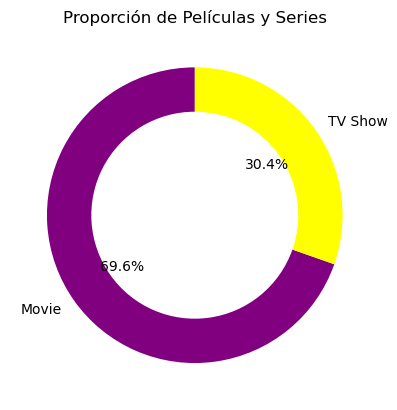

In [ ]:
distribution = df['type'].value_counts()
plt.pie(distribution, labels=distribution.index, autopct='%1.1f%%', colors=['purple', 'yellow'], startangle=90, wedgeprops=dict(width=0.3))
plt.title('Proporción de Películas y Series')
plt.show()

- Tenemos 6131 Movies y 2676 TV Shows de un total de 8807 titulos, las cuales representan 69.6% y 30.4% del total respectivamente.

<Figure size 1200x600 with 0 Axes>

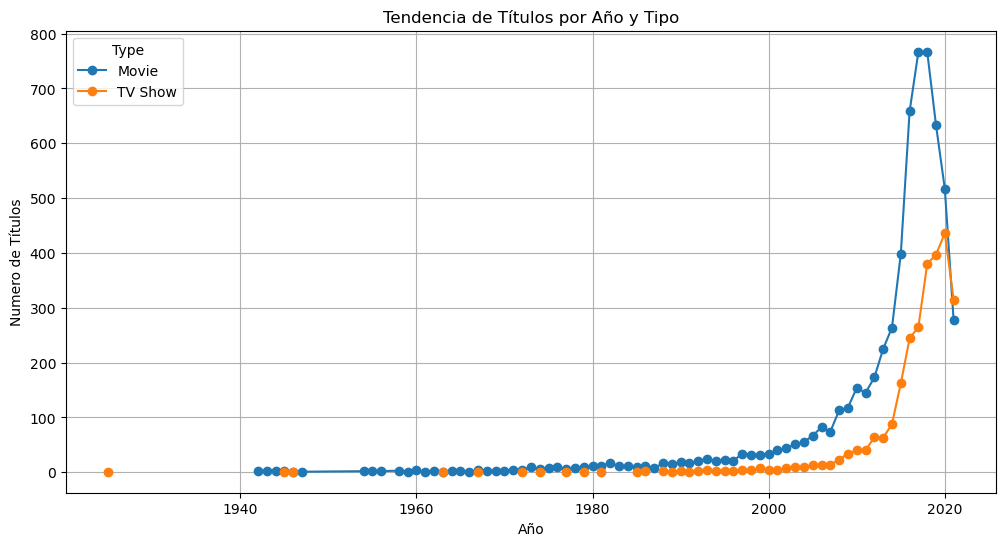

In [150]:
plt.figure(figsize=(12, 6))

type_counts = df.groupby(['release_year', 'type']).size().unstack()

type_counts.plot(kind='line', marker='o', figsize=(12, 6))

plt.title('Tendencia de Títulos por Año y Tipo')
plt.xlabel('Año')
plt.ylabel('Numero de Títulos')
plt.grid(True)
plt.legend(title='Type')
plt.show()

-La tendencia demuestra un incremento exponencial a partir del año 2000. Previo a ello, se nota una bajo volumen de peliculas y series en comparación, esto se puede deber a la falta de tecnologia y recursos en comparacion a epocas actuales.
-Podemos ver el mayor crecimiento en los primeros años de la decada del 2000, teniendo un declive para finales de 2020 debido seguramente a la pandemia global.
-De igual manera se nota una tendencia historica por las peliculas en contraste con las series, esto puede ser debido a los tiempos de producción, popularidad o inclusive un beneficio monetario.

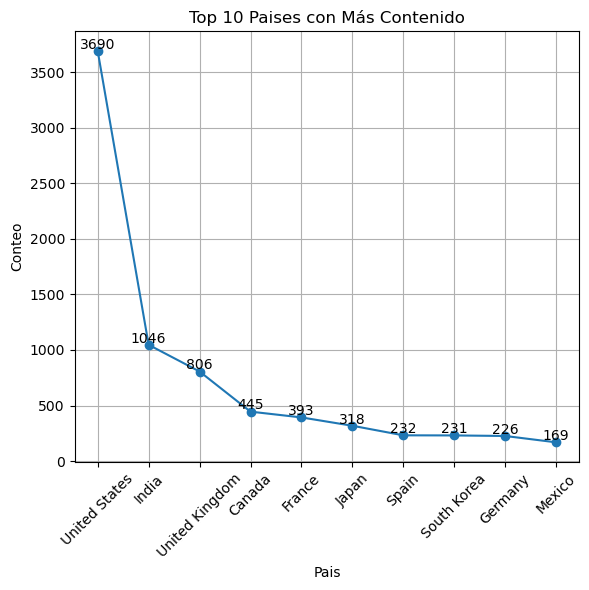

In [151]:
plt.figure(figsize=(6, 6))
plt.plot(range(len(conteo_country)), conteo_country.values, marker='o')

for i, val in enumerate(conteo_country.values):
    plt.text(i, val + 20, str(val), ha='center')

plt.title('Top 10 Paises con Más Contenido')
plt.xlabel('Pais')
plt.ylabel('Conteo')
plt.grid(True)
plt.xticks(range(len(conteo_country)), conteo_country.index, rotation=45)
plt.tight_layout()
plt.show()

-Claramente el pais con un mayor número de titulos es Estados Unidos con 3690.
-En segundo lugar esta la India con menos de la mitad que el primer lugar.
-El resto representan poco más de la mitad del primer lugar.

C:\Users\luigu\AppData\Local\Temp\ipykernel_9724\1936933808.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_5['month_added'] = df_last_5['date_added'].dt.month_name()


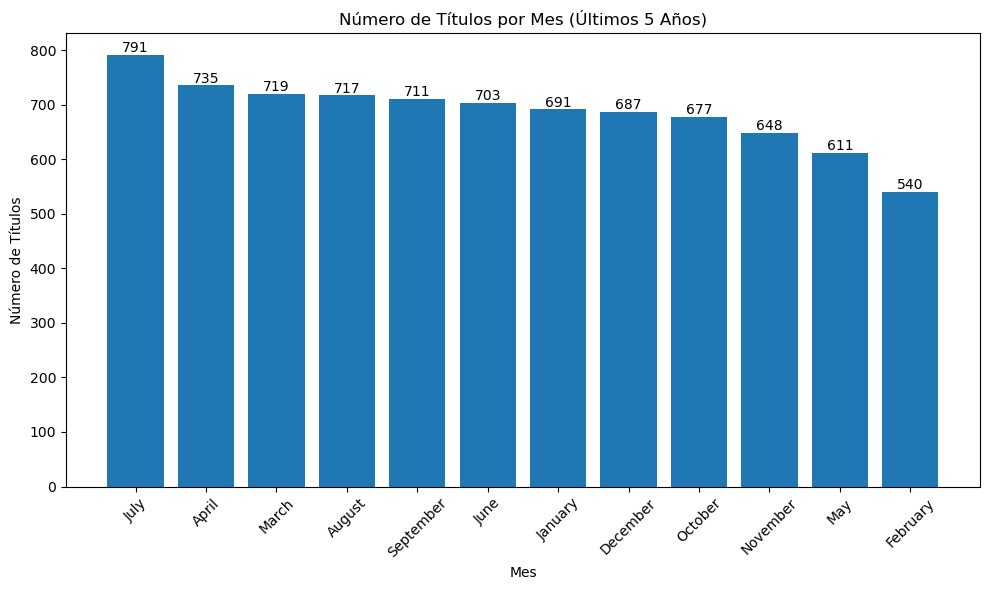

In [152]:
# Limpiar espacios y convertir a fecha
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), format='mixed', errors='coerce')

# Filtrar últimos 5 años
df_last_5 = df[df['date_added'].dt.year >= (df['date_added'].dt.year.max() - 4)]

# Extraer el mes
df_last_5['month_added'] = df_last_5['date_added'].dt.month_name()

# Contar títulos por mes
conteo_meses = df_last_5['month_added'].value_counts()

# Graficar
plt.figure(figsize=(10, 6))
plt.bar(conteo_meses.index, conteo_meses.values)
plt.title('Número de Títulos por Mes (Últimos 5 Años)')
plt.xlabel('Mes')
plt.ylabel('Número de Títulos')

# Etiquetas con valores
for i, val in enumerate(conteo_meses.values):
    plt.text(i, val + 5, str(val), ha='center')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

-Julio es el mes con más títulos agregados en los últimos 5 años, lo que sugiere que Netflix refuerza su catálogo para el verano, probablemente por las vacaciones escolares y mayor consumo de contenido.

-Aunque hay meses picos y bajos, la mayoría se mueve entre 600 y 700 títulos, lo que indica una estrategia de incorporación de contenido bastante constante.

-El hecho de que haya ligeros picos en meses concretos podría indicar que Netflix sigue un calendario de lanzamientos estratégicos.